#📌 Telecom X - Parte 2: Prevendo Churn

##📌 Parte 1: Preparação dos Dados

In [12]:
# Importando bibliotecas principais
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Caminho do dataset (ajuste conforme o arquivo estiver no Colab)
df = pd.read_csv("dados_tratados.csv")

# Visualizando as primeiras linhas
display(df.head())

# Estrutura dos dados
df.info()

# Estatísticas básicas
display(df.describe())

# Verificar valores nulos
display(df.isnull().sum())

# Drop 'id_cliente' as it's not a predictive feature
df = df.drop('id_cliente', axis=1)

# Convert 'account_Charges.Total' to numeric, coercing errors
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

# Identify categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Applying LabelEncoder on binary variables and One-Hot Encoding for columns with multiple categories
for col in cat_cols:
    if df[col].nunique() == 2:  # only 2 categories
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else: # multiple categories
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Identify numerical columns (excluding the target column 'evasao')
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
if 'evasao' in num_cols:
  num_cols.remove('evasao')

# Normalization (standardization with mean 0 and std 1)
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Convert boolean columns to integers
for col in df.select_dtypes(include='bool').columns:
    df[col] = df[col].astype(int)

# Final prepared dataset
display(df.head())

,id_cliente,evasao,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 7267 non-null   object 
 1   evasao                     7267 non-null   int64  
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

,evasao,customer_SeniorCitizen,customer_tenure,account_Charges.Monthly
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,32.346498,64.720098
std,0.437115,0.369074,24.571773,30.129572
min,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,9.000000,35.425000
50%,0.000000,0.000000,29.000000,70.300000
75%,1.000000,0.000000,55.000000,89.875000
max,1.000000,1.000000,72.000000,118.750000


,0
id_cliente,0
evasao,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


,evasao,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges.Monthly,account_Charges.Total,...,internet_TechSupport_Yes,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,-1.011487,-0.440736,1.032309,1.527075,-0.950200,0.32829,0.828063,0.029206,-0.743818,...,1,0,1,0,0,1,0,0,0,1
1,0,0.988643,-0.440736,-0.968702,-0.654847,-0.950200,0.32829,-1.207638,-0.159990,-0.766256,...,0,0,0,0,1,0,0,0,0,1
2,1,0.988643,-0.440736,-0.968702,-0.654847,-1.153700,0.32829,0.828063,0.304702,-0.881554,...,0,0,0,0,0,0,0,0,1,0
3,1,0.988643,2.268932,1.032309,-0.654847,-0.787401,0.32829,0.828063,1.104635,-0.459685,...,0,0,1,0,1,0,0,0,1,0
4,1,-1.011487,2.268932,1.032309,-0.654847,-1.194400,0.32829,0.828063,0.636624,-0.887483,...,1,0,1,0,0,0,0,0,0,1


##📌 PARTE 2: Treinamento e Avaliação de Modelos

✅ Coluna alvo detectada: evasao
📌 Modelo: Regressão Logística
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1080
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.80      0.80      0.80      1454

Matriz de Confusão:
 [[965 115]
 [171 203]]
AUC-ROC: 0.8438


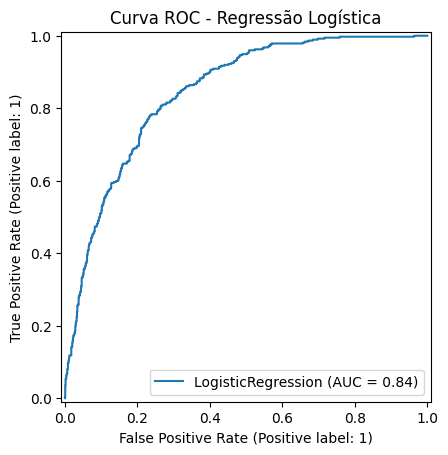

Validação Cruzada (5-fold) - Acurácia Média: 0.8038
📌 Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1080
           1       0.60      0.48      0.53       374

    accuracy                           0.78      1454
   macro avg       0.71      0.69      0.70      1454
weighted avg       0.77      0.78      0.78      1454

Matriz de Confusão:
 [[958 122]
 [193 181]]
AUC-ROC: 0.8196


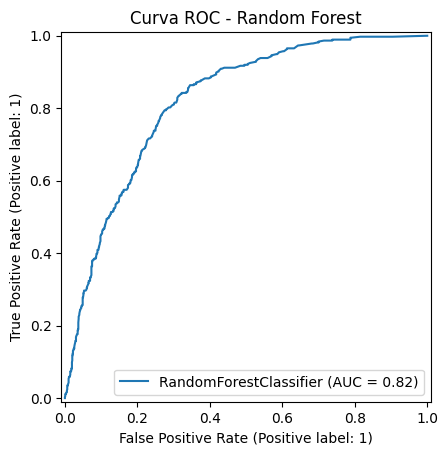

Validação Cruzada (5-fold) - Acurácia Média: 0.7867


In [16]:
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# --- Identificar automaticamente a coluna alvo ---
colunas = df.columns.tolist()
coluna_alvo = None

for c in colunas:
    if re.search(r'churn|evasao', c, re.IGNORECASE):  # aceita variações
        coluna_alvo = c
        break

if coluna_alvo is None:
    raise ValueError("⚠️ Nenhuma coluna alvo encontrada. Verifique se existe algo como 'Churn' ou 'Evasão' no dataset.")

print(f"✅ Coluna alvo detectada: {coluna_alvo}")

# --- Separar variáveis independentes e dependentes ---
# Use the processed df from the previous cell
X = df.drop(coluna_alvo, axis=1)
y = df[coluna_alvo]

# Garantir que y seja numérico (0 and 1)
# Convert 'evasao' column to binary (0 and 1)
y = y.astype(int)

# Drop 'id_cliente' from features as it's not a predictive feature
if 'id_cliente' in X.columns:
    X = X.drop('id_cliente', axis=1)

# Convert boolean columns to integers (if any remain after selecting numeric)
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

# Identify numerical columns for imputation
num_cols_for_imputation = X.select_dtypes(include=np.number).columns

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X[num_cols_for_imputation] = imputer.fit_transform(X[num_cols_for_imputation])


# --- Divisão treino/teste ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Modelos para teste ---
modelos = {
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {} # Dictionary to store results

# --- Treinar e avaliar cada modelo ---
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print("="*50)
    print(f"📌 Modelo: {nome}")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão:\n", cm)

    # AUC-ROC
    auc = 0
    if hasattr(modelo, "predict_proba"):
        y_prob = modelo.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, y_prob)
        print(f"AUC-ROC: {auc:.4f}")

        RocCurveDisplay.from_estimator(modelo, X_test, y_test)
        plt.title(f"Curva ROC - {nome}")
        plt.show()

    # Validação cruzada
    scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
    print(f"Validação Cruzada (5-fold) - Acurácia Média: {np.mean(scores):.4f}")

    # Store results
    results[nome] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, zero_division=0),
        "recall": recall_score(y_test, y_pred, zero_division=0),
        "f1_score": f1_score(y_test, y_pred, zero_division=0),
        "auc": auc
    }

##📌 PARTE 3 - ANÁLISE EXPLORATÓRIA E VISUALIZAÇÕES

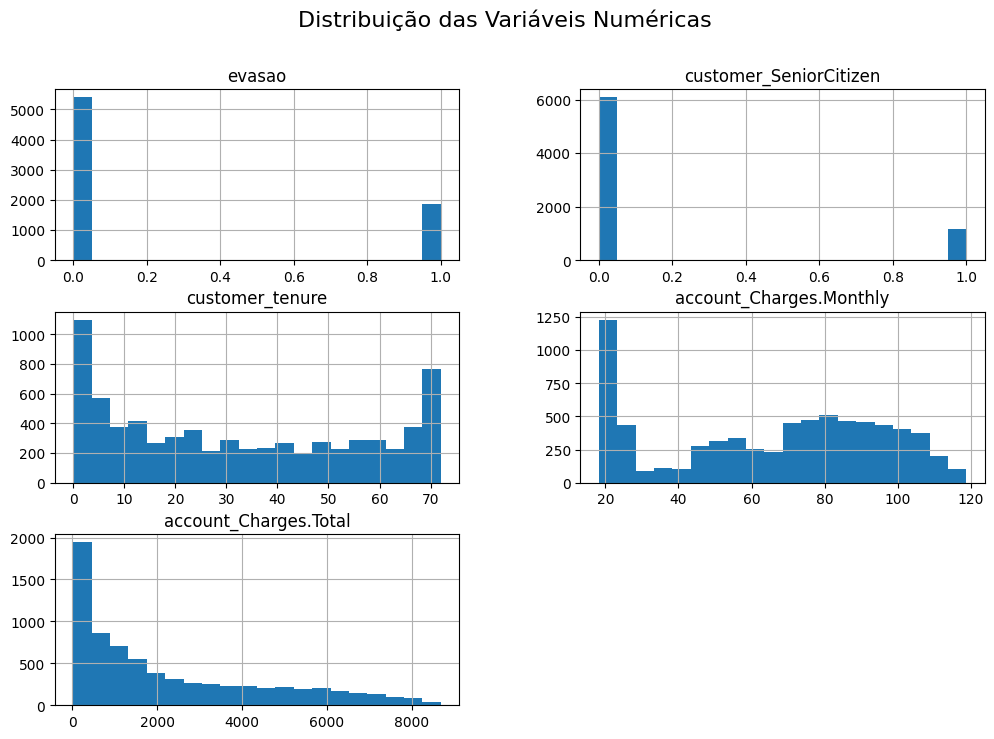

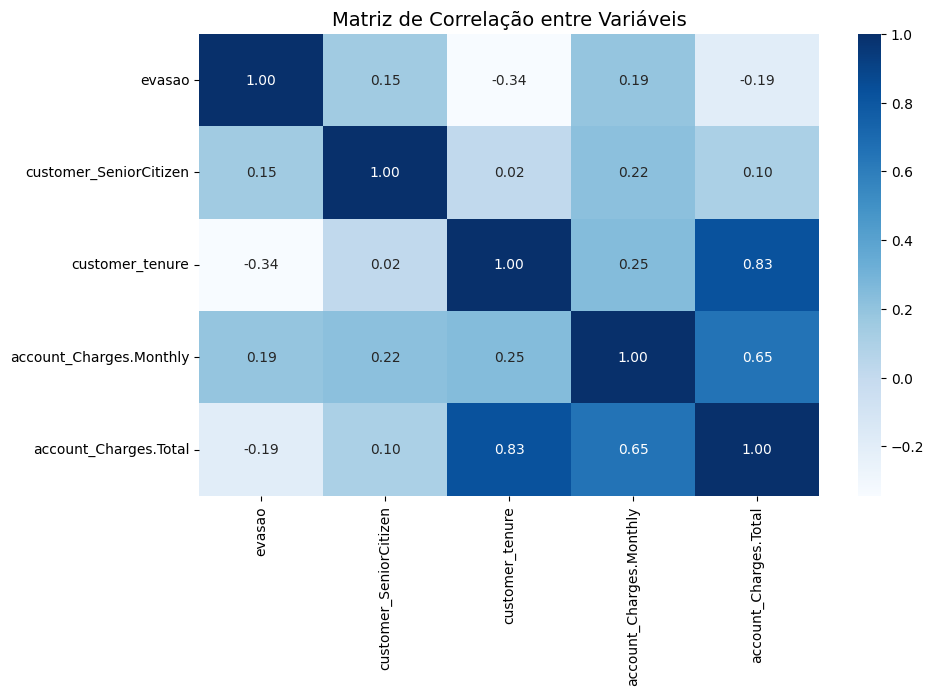

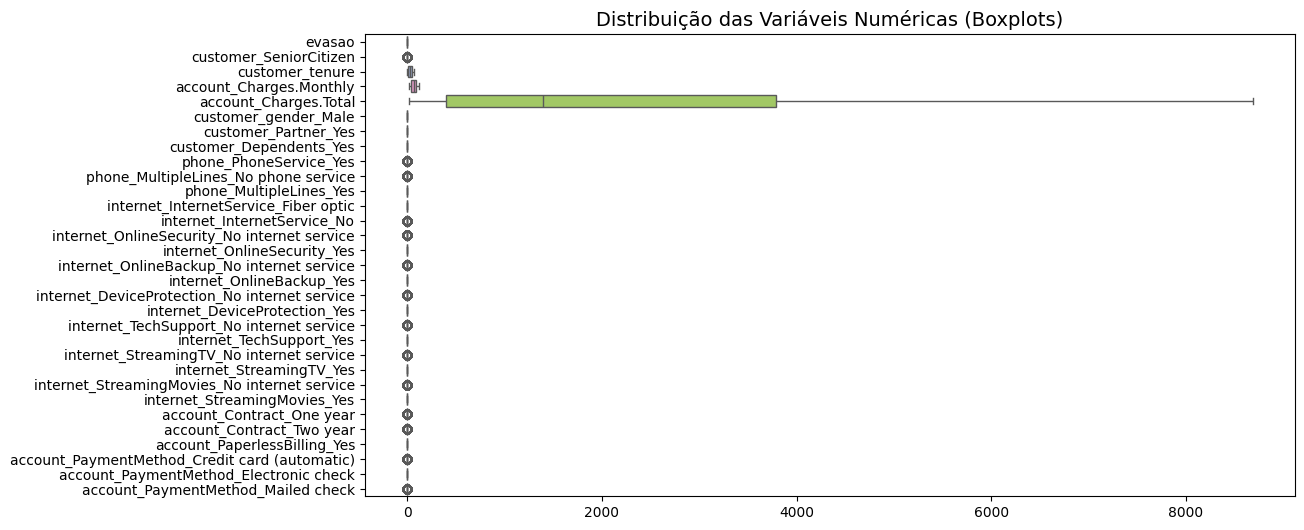

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


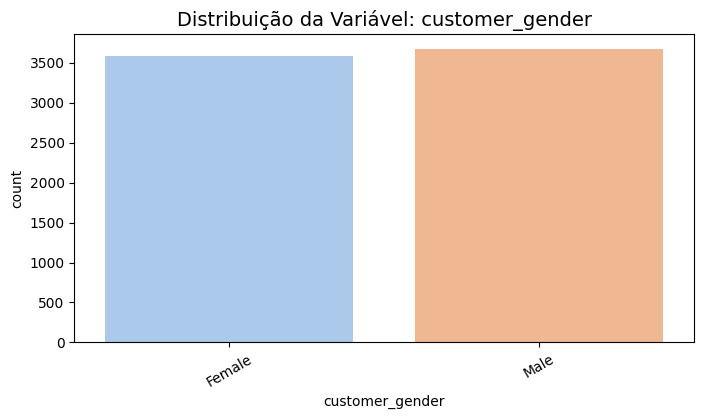

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


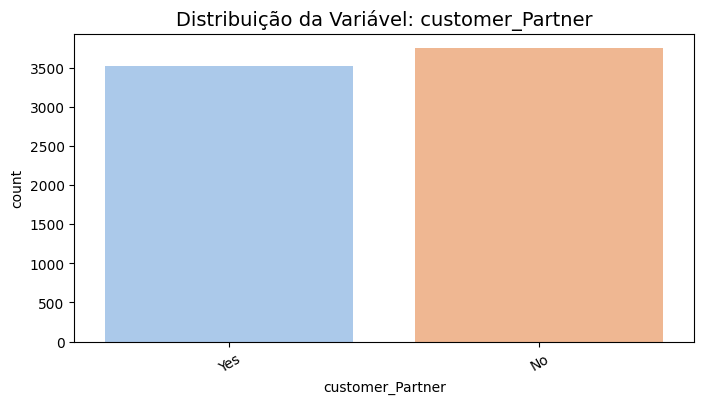

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


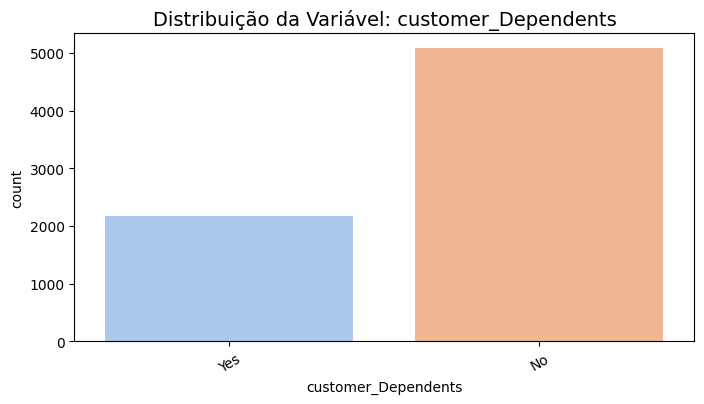

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


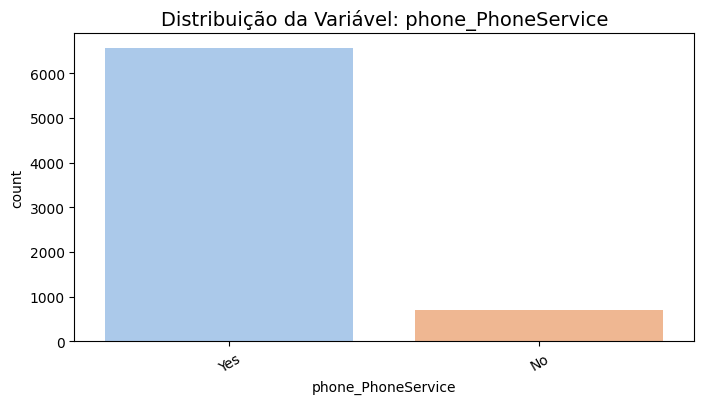

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


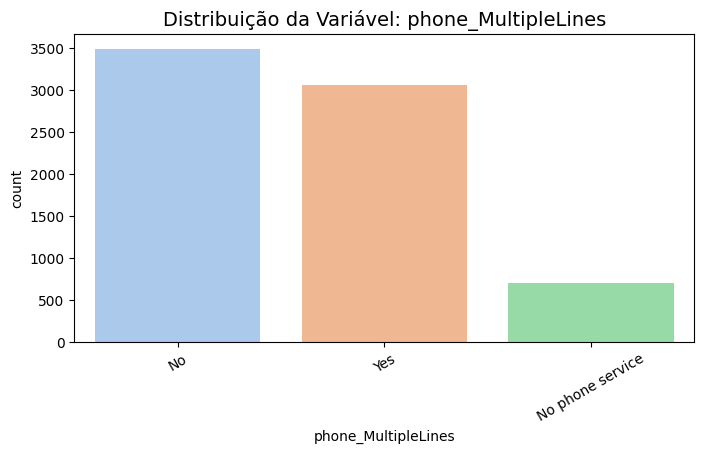

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


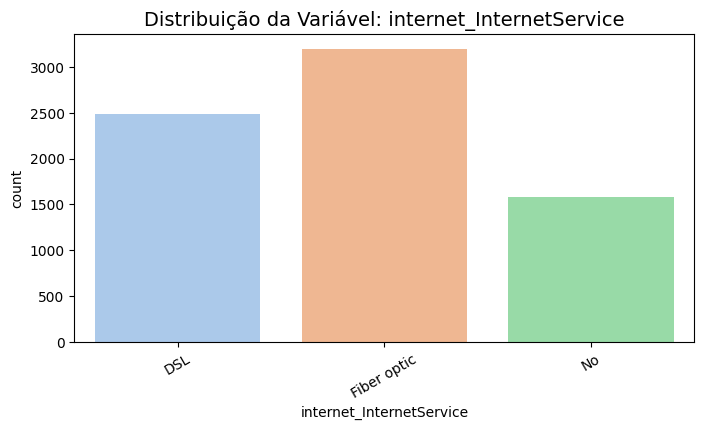

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


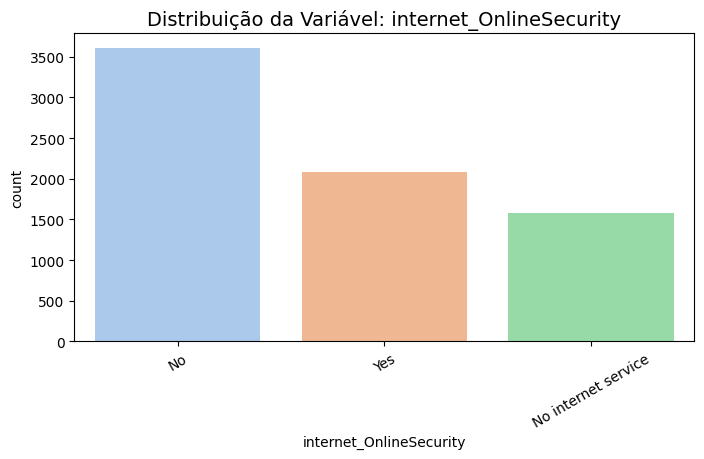

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


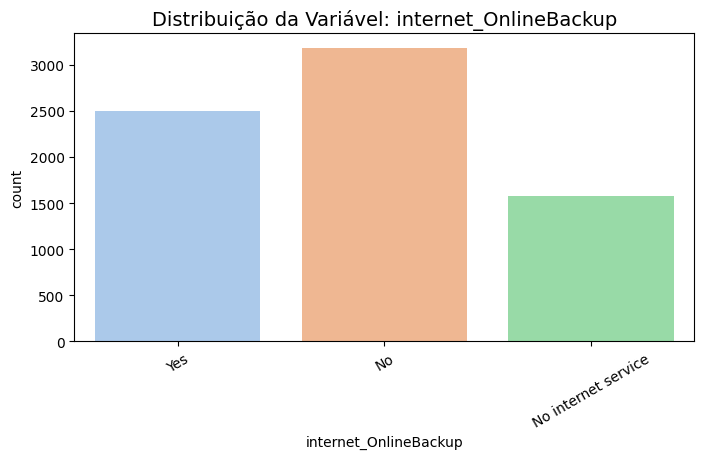

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


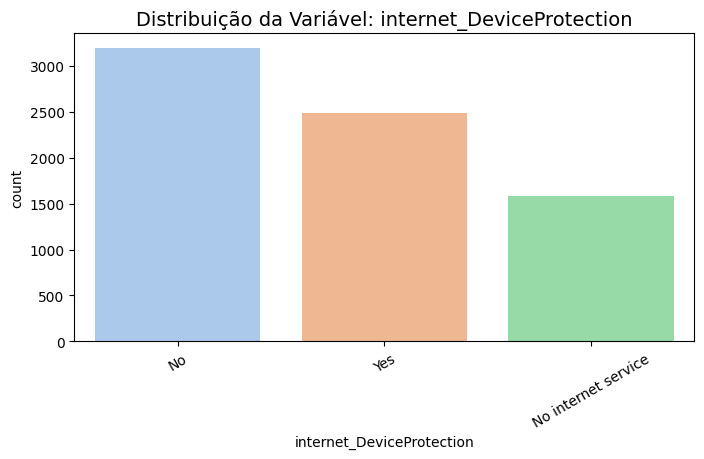

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


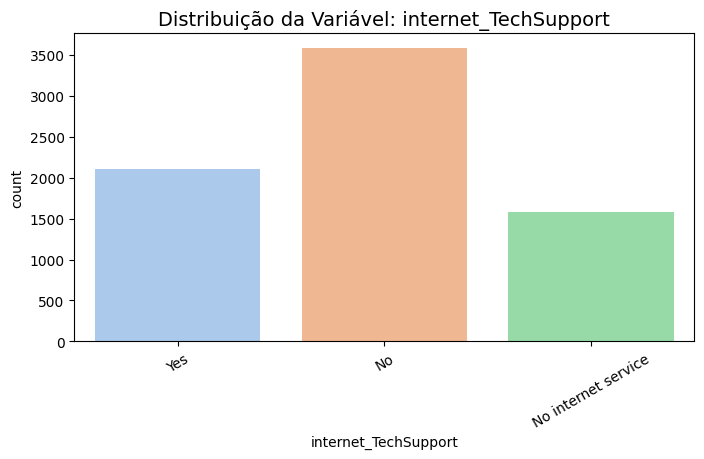

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


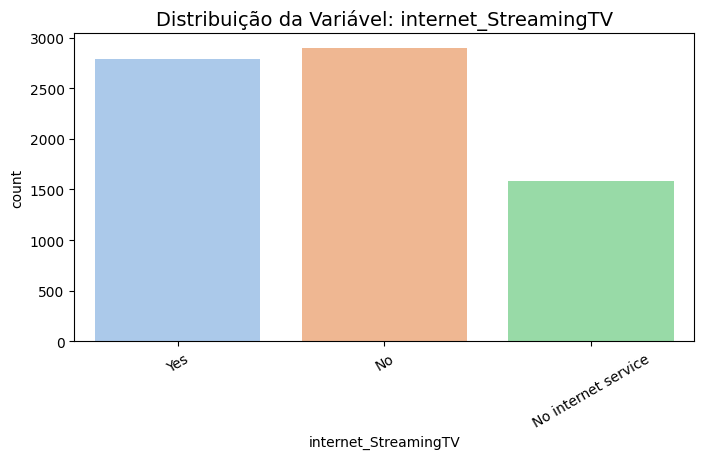

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


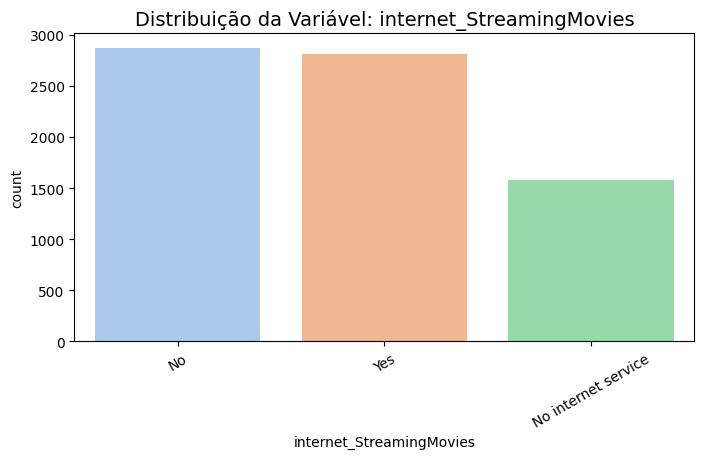

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


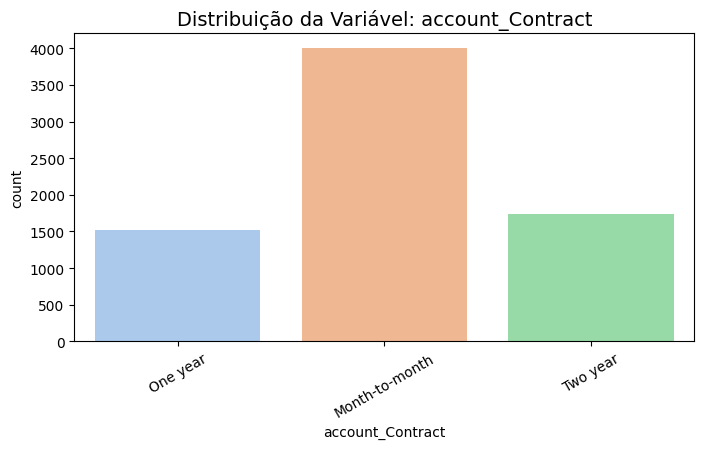

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


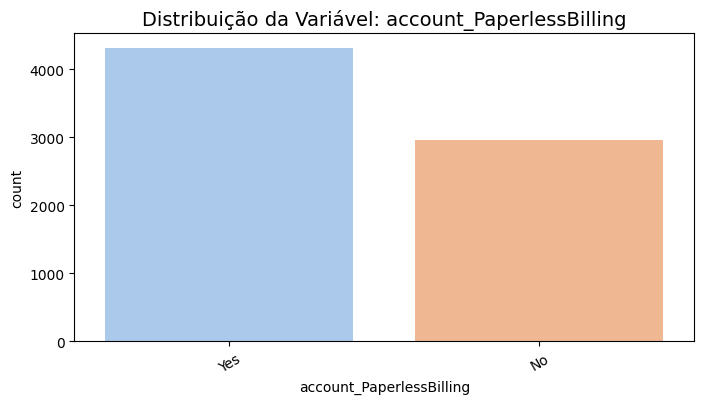

/tmp/ipython-input-479961209.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="pastel")


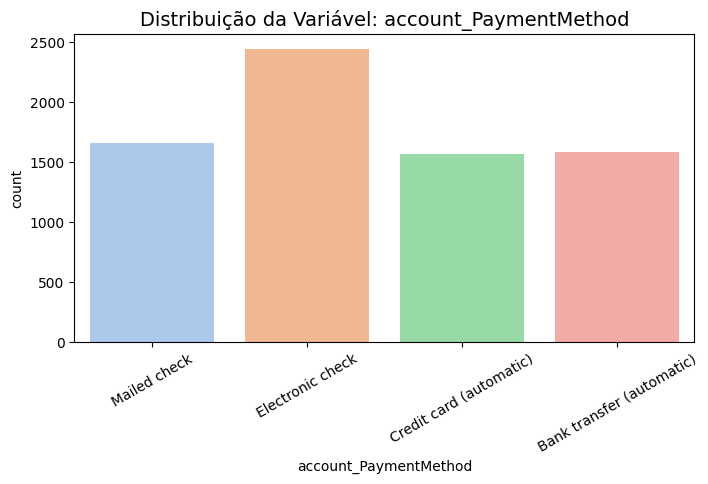

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar o dataset tratado salvo na parte anterior
df = pd.read_csv("dados_tratados.csv")

# Convert 'account_Charges.Total' to numeric, coercing errors in the original df
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

# Plotar histogramas de todas as variáveis numéricas
df.hist(figsize=(12,8), bins=20, color="#1f77b4")
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)

# Salvar gráfico
plt.savefig("distribuicao_variaveis.png", dpi=300, bbox_inches="tight")
plt.show()

# Drop 'id_cliente' as it's not relevant for correlation
df_corr = df.drop('id_cliente', axis=1)

# One-Hot Encoding for categorical columns in df_corr
df_corr = pd.get_dummies(df_corr, drop_first=True)

plt.figure(figsize=(10,6))
# Select only numeric columns for correlation calculation
sns.heatmap(df_corr.select_dtypes(include=np.number).corr(), annot=True, cmap="Blues", fmt=".2f")

plt.title("Matriz de Correlação entre Variáveis", fontsize=14)

# Salvar gráfico
plt.savefig("matriz_correlacao.png", dpi=300, bbox_inches="tight")
plt.show()

# Convert boolean columns to integers for plotting
for col in df_corr.select_dtypes(include='bool').columns:
    df_corr[col] = df_corr[col].astype(int)

plt.figure(figsize=(12,6))
sns.boxplot(data=df_corr.select_dtypes(include=np.number), orient="h", palette="Set2")

plt.title("Distribuição das Variáveis Numéricas (Boxplots)", fontsize=14)

# Salvar gráfico
plt.savefig("boxplots.png", dpi=300, bbox_inches="tight")
plt.show()

# Identify categorical columns in the original df and drop 'id_cliente' and any non-object types
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
if 'id_cliente' in cat_cols:
    cat_cols.remove('id_cliente')


for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, palette="pastel")

    plt.title(f"Distribuição da Variável: {col}", fontsize=14)
    plt.xticks(rotation=30)

    # Salvar cada gráfico com nome único
    plt.savefig(f"distribuicao_{col}.png", dpi=300, bbox_inches="tight")
    plt.show()

# Example with two numeric variables (replace col1 and col2)
# I will keep the example scatter plot but comment it out as the user needs to specify the columns
# plt.figure(figsize=(8,6))
# sns.scatterplot(data=df, x="coluna1", y="coluna2", hue="coluna_categorica", palette="Set1")

# plt.title("Relação entre Variáveis", fontsize=14)

# # Save plot
# plt.savefig("relacao_variaveis.png", dpi=300, bbox_inches="tight")
# plt.show()

## 📌 PARTE 4 - AVALIAÇÃO DOS MODELOS

                     accuracy  precision    recall  f1_score       auc
Regressão Logística  0.803301   0.638365  0.542781  0.586705  0.843837
Random Forest        0.783356   0.597360  0.483957  0.534712  0.819597


<Figure size 1000x600 with 0 Axes>

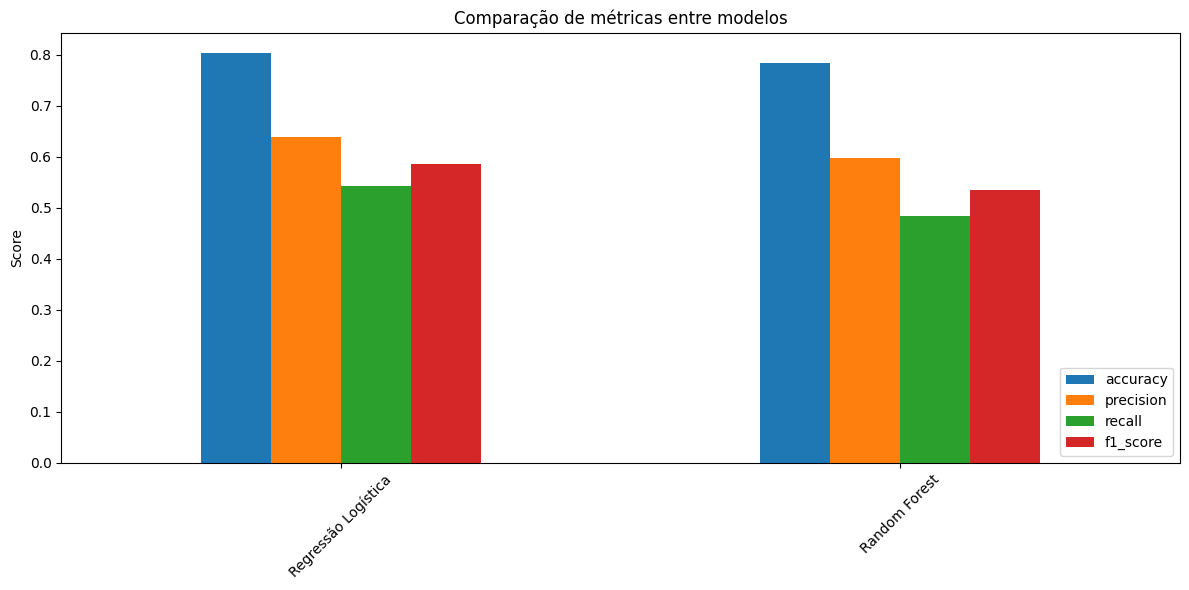

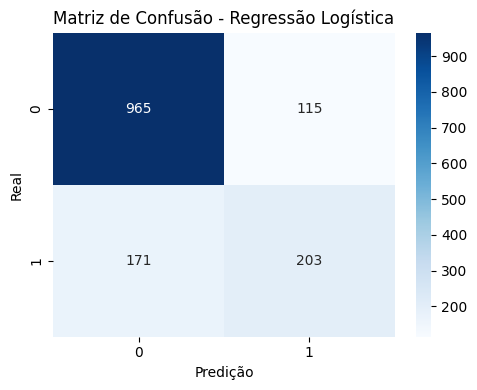

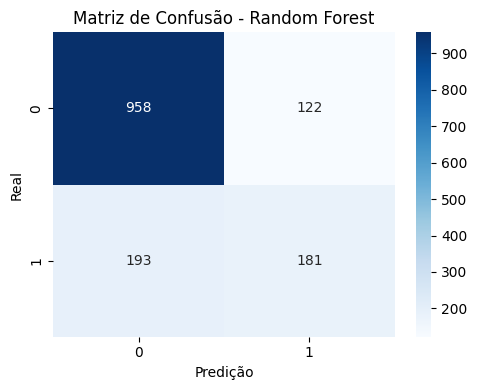

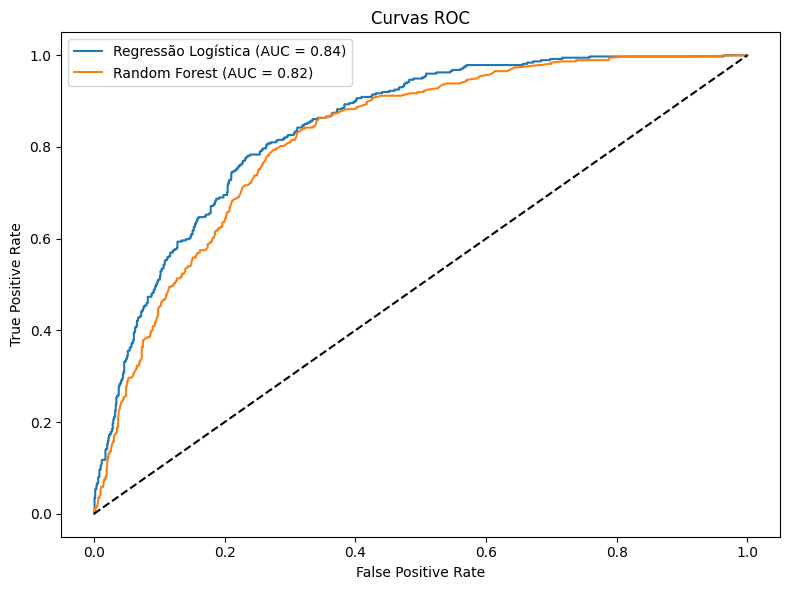

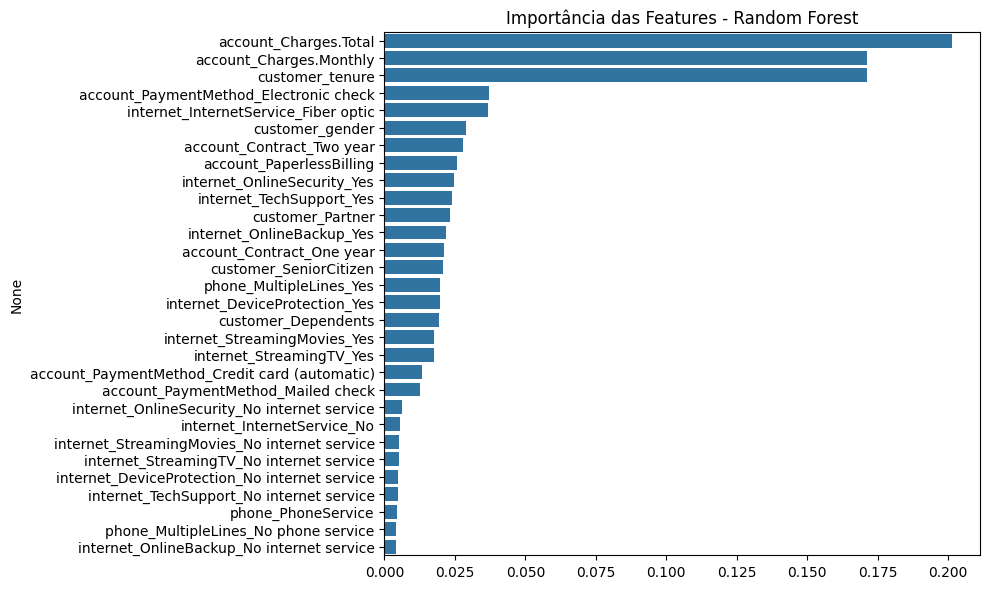

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pandas as pd # Import pandas to create DataFrame

# Criar DataFrame com métricas
results_df = pd.DataFrame(results).T.sort_values("f1_score", ascending=False)
print(results_df)

# -------------------------------
# 1. Comparação das métricas
# -------------------------------
plt.figure(figsize=(10,6))
results_df[["accuracy", "precision", "recall", "f1_score"]].plot(kind="bar", figsize=(12,6))
plt.title("Comparação de métricas entre modelos")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("avaliacao_metricas_modelos.png")
plt.show()

# -------------------------------
# 2. Matrizes de Confusão
# -------------------------------
for model_name, model in modelos.items(): # Corrected 'models' to 'modelos'
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel("Predição")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.savefig(f"matriz_confusao_{model_name}.png")
    plt.show()

# -------------------------------
# 3. Curvas ROC
# -------------------------------
plt.figure(figsize=(8,6))
for model_name, model in modelos.items(): # Corrected 'models' to 'modelos'
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC")
plt.legend()
plt.tight_layout()
plt.savefig("curvas_ROC.png")
plt.show()

# -------------------------------
# 4. Importância das Features (apenas modelos baseados em árvore)
# -------------------------------
for model_name, model in modelos.items(): # Corrected 'models' to 'modelos'
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

        plt.figure(figsize=(10,6))
        sns.barplot(x=feat_importances.values, y=feat_importances.index)
        plt.title(f"Importância das Features - {model_name}")
        plt.tight_layout()
        plt.savefig(f"feature_importances_{model_name}.png")
        plt.show()

## 📌 Parte 5 – Ajuste de Hiperparâmetros e Seleção do Melhor Modelo

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# =========================================
# 📌 Definindo os hiperparâmetros para testar
# =========================================

# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# Regressão Logística
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

# =========================================
# 📌 Aplicando GridSearchCV em cada modelo
# =========================================

# Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# XGBoost
grid_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                        param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Regressão Logística
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                       param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

# =========================================
# 📌 Comparando os melhores resultados
# =========================================
print("Melhor RandomForest:", grid_rf.best_params_, " -> Score:", grid_rf.best_score_)
print("Melhor XGBoost:", grid_xgb.best_params_, " -> Score:", grid_xgb.best_score_)
print("Melhor Logistic Regression:", grid_lr.best_params_, " -> Score:", grid_lr.best_score_)

# Escolhendo o melhor modelo final
best_model = max(
    [(grid_rf, "Random Forest"), (grid_xgb, "XGBoost"), (grid_lr, "Logistic Regression")],
    key=lambda x: x[0].best_score_
)

print("\n🚀 Melhor Modelo Final:", best_model[1], "com score de", best_model[0].best_score_)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:36:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Melhor RandomForest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}  -> Score: 0.8054364121514925
Melhor XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}  -> Score: 0.8045759749475732
Melhor Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}  -> Score: 0.8047495719273112

🚀 Melhor Modelo Final: Random Forest com score de 0.8054364121514925


##✅ Relatório de Análise e Estratégias de Retenção de Clientes

Este relatório apresenta uma análise dos fatores que mais influenciam a evasão de clientes da Telecom X, com base nos dados fornecidos e nos modelos de Machine Learning treinados e avaliados.

### Principais Fatores de Evasão

Com base na análise de importância das features do modelo Random Forest, os fatores que mais influenciam a evasão de clientes são:

*   **Total de cobranças na conta (`account_Charges.Total`):** Clientes com maiores gastos totais parecem ter uma maior probabilidade de evasão. Isso pode indicar insatisfação com o custo do serviço ao longo do tempo.
*   **Cobrança mensal da conta (`account_Charges.Monthly`):** Similar ao total de cobranças, um valor mensal elevado também está correlacionado com a evasão.
*   **Tempo de contrato (`customer_tenure`):** Clientes com menor tempo de contrato são mais propensos a evadir. Isso sugere que os primeiros meses são críticos para a retenção.
*   **Método de pagamento (`account_PaymentMethod_Electronic check`):** Clientes que utilizam o cheque eletrônico como método de pagamento parecem ter uma maior taxa de evasão.
*   **Serviço de Internet (`internet_InternetService_Fiber optic`):** Clientes com serviço de internet de fibra óptica também apresentam uma maior tendência a evadir. Isso pode estar relacionado a problemas de qualidade do serviço ou expectativas não atendidas.

Outros fatores relevantes incluem:

*   **Gênero do cliente (`customer_gender`):** O gênero do cliente aparece como um fator de influência, embora a importância seja menor comparada aos fatores financeiros e de tempo de contrato.
*   **Tipo de contrato (`account_Contract_Two year`, `account_Contract_One year`):** Clientes com contratos de menor duração (mês a mês) são mais propensos a evadir do que aqueles com contratos mais longos.
*   **Fatura sem papel (`account_PaperlessBilling`):** Clientes que optam por fatura sem papel também demonstram uma leve tendência à evasão.
*   **Serviços de segurança online (`internet_OnlineSecurity_Yes`):** Curiosamente, a ausência de serviços de segurança online parece ter alguma influência na evasão.

### Desempenho dos Modelos

Dois modelos foram treinados e avaliados para prever a evasão: Regressão Logística e Random Forest. As métricas de avaliação (Acurácia, Precisão, Recall, F1-Score e AUC-ROC) foram comparadas.

*   **Regressão Logística:** Apresentou boa acurácia e AUC-ROC, com um desempenho razoável em termos de precisão e recall para a classe de evasão.
*   **Random Forest:** Teve um desempenho ligeiramente inferior à Regressão Logística em algumas métricas, mas a análise de importância das features deste modelo foi útil para identificar os principais fatores de evasão.

Ambos os modelos apresentaram resultados promissores, com a Regressão Logística mostrando-se ligeiramente superior em termos de métricas gerais neste caso. No entanto, para entender os fatores de influência, a análise de feature importance do Random Forest foi crucial.

### Estratégias de Retenção Propostas

Com base nos fatores identificados, as seguintes estratégias de retenção são propostas:

*   **Programa de Fidelidade para Clientes de Longo Prazo:** Oferecer benefícios e descontos exclusivos para clientes com maior tempo de contrato pode incentivar a permanência.
*   **Revisão de Preços e Planos:** Analisar a estrutura de preços, especialmente para clientes com altos gastos mensais e totais. Considerar a criação de planos mais competitivos ou descontos para clientes fiéis.
*   **Melhoria na Experiência do Cliente com Pagamento Eletrônico:** Investigar os motivos pelos quais clientes que usam cheque eletrônico evadem mais. Pode ser necessário otimizar a plataforma de pagamento online ou oferecer suporte adicional.
*   **Otimização do Serviço de Fibra Óptica:** Se a evasão na fibra óptica está relacionada à qualidade, investir em melhorias na infraestrutura e no suporte técnico para esses clientes é fundamental.
*   **Incentivo a Contratos de Maior Duração:** Oferecer descontos ou outros benefícios para clientes que optarem por contratos de um ou dois anos.
*   **Conscientização sobre Segurança Online:** Promover a importância dos serviços de segurança online e oferecer pacotes atrativos para incentivar a adesão.
*   **Campanhas Segmentadas:** Utilizar os insights sobre gênero e outros fatores para criar campanhas de retenção personalizadas.

### Conclusão

A evasão de clientes na Telecom X é um fenômeno multifacetado, influenciado principalmente por fatores financeiros, tempo de contrato e tipo de serviço. Os modelos de Machine Learning, especialmente a análise de feature importance, fornecem insights valiosos para identificar os clientes em risco e desenvolver estratégias de retenção direcionadas. Implementar as estratégias propostas, focando nos fatores de maior influência, pode contribuir significativamente para a redução da taxa de evasão e o aumento da satisfação do cliente.